## Fonseca and Fleming function 

Problem taken from \[Fonseca, C. M.; Fleming, P. J. (1995). An Overview of Evolutionary Algorithms in Multiobjective Optimization. Evol Comput. 3 (1): 1–16\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i - \frac{1}{\sqrt{3}} \right)^2 \right]$

$f_2 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i + \frac{1}{\sqrt{3}} \right)^2 \right]$

*in the domain*

$-4 \le x_1,x_2,x_3 \le 4$

In [1]:
import mosa
from math import exp, sqrt
from numpy.random import seed

%matplotlib inline

In [2]:
seed(0)

### Translates the Fonseca and Fleming problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the functions to be minimized. 

The solution to the problem is $X$, which is a list with three elements.

In [3]:
def fobj(X: list) -> tuple:
    g1: float = 0.0
    g2: float = 0.0
    Y: float = 1.0 / sqrt(3.0)

    for i in range(3):
        g1 += pow(X[i] - Y, 2)
        g2 += pow(X[i] + Y, 2)

    f1: float = 1.0 - exp(-g1)
    f2: float = 1.0 - exp(-g2)

    return f1, f2

### Initialization

In [4]:
opt = mosa.Anneal()

--------------------------------------------------
 MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA) 0.8.5  
--------------------------------------------------


In [5]:
opt.set_population(X=(-4.0, 4.0))

In [6]:
opt.archive_size = 10000
opt.maximum_archive_rejections = 10000

### Hot run

A first run starting at very high temperatures (1.0) is performed. This initial "hot run" helps the algorithm not to be trapped.

In [7]:
opt.initial_temperature = 1.0
opt.number_of_iterations = 100
opt.number_of_temperatures = 100
opt.temperature_decrease_factor = 0.95

In [8]:
opt.set_group_params("X", number_of_elements=3, mc_step_size=1.0)

In [9]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------

Groups in the solution:

    X:
        Number of elements: 3
        Sample space: continuous
        Boundaries: (-4.0,4.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 1.0
------
Initializing with a random solution from scratch...
Done!
------
Starting at temperature: 1.000000
Evolving solutions to the problem, please wait...
Maximum number of temperatures reached!
Stopping at temperature:  0.006232.
------

--- THE END ---
CPU times: total: 9.38 s
Wall time: 9.88 s


In [10]:
print(f"Number of solutions stored in the archive: {opt.sizex()}")

Number of solutions stored in the archive: 223


### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (0.01) is performed to allow the solutions to relax to the vicinity of the Pareto front.

In [11]:
opt.initial_temperature = 0.01

In [12]:
opt.set_group_params("X", mc_step_size=0.1)

In [13]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------

Groups in the solution:

    X:
        Number of elements: 3
        Sample space: continuous
        Boundaries: (-4.0,4.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.1
------
Initial solution loaded from the checkpoint file...
Done!
------
Starting at temperature: 0.010000
Evolving solutions to the problem, please wait...
Maximum number of temperatures reached!
Stopping at temperature:  0.000062.
------

--- THE END ---
CPU times: total: 7.52 s
Wall time: 7.87 s


In [14]:
print(f"Number of solutions stored in the archive: {opt.sizex()}")

Number of solutions stored in the archive: 470


### Output

In [15]:
%%time
pruned = opt.prune_dominated()
print(f"Number of solutions stored in the pruned archive: {opt.sizex(pruned)}")

Number of solutions stored in the pruned archive: 231
CPU times: total: 62.5 ms
Wall time: 37.6 ms


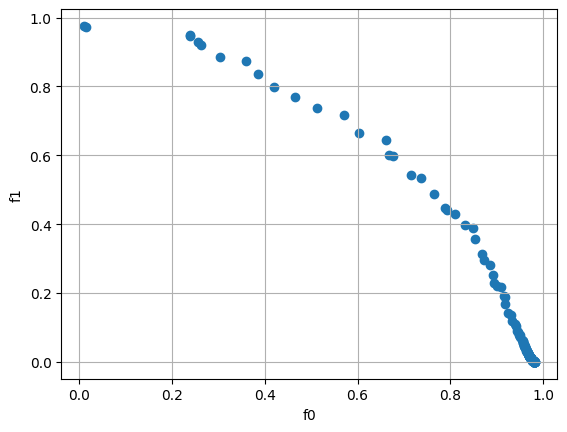

In [16]:
opt.plot_front(pruned)